# Content Based Recommendation System
Recommends modules based on the features of the given module. The features are moduleName, intro, description, keywords and objectives. The features are combined and cleaned. The cleaned features are then used to find the cosine similarity between the given module and all the other modules. The modules with the highest cosine similarity are recommended.

In [109]:
import pandas as pd

In [110]:
df = pd.read_json('input/modules.json')

In [111]:
df.head()

,id,moduleName,keywords,intro,description,objectives
0,{'$oid': '6400ca8dfc13ae6500000834'},Pannier,"[Advanced, 24/7, Team-oriented, User-friendly,...",Up-sized dedicated circuit,Upgradable didactic product,"[IT Law, Protein Purification, Hyper-V, ERD, F..."
1,{'$oid': '6400ca8dfc13ae6500000835'},Cardguard,"[internet solution, process improvement, defin...",Quality-focused non-volatile standardization,Switchable solution-oriented intranet,"[FSI, JPA, Single Family Homes, 7 QC Tools, Au..."
2,{'$oid': '6400ca8dfc13ae6500000836'},Zoolab,"[synergy, Reactive, Team-oriented, strategy, f...",Customizable 5th generation database,Down-sized fault-tolerant hub,"[Emergency Medicine, TUPE, NoSQL, Heavy Oil, S..."
3,{'$oid': '6400ca8dfc13ae6500000837'},Veribet,"[superstructure, analyzer, Re-contextualized, ...",Front-line zero tolerance matrix,Distributed interactive open system,"[Water Quality, TSYS, Pneumatic Conveying, BMV..."
4,{'$oid': '6400ca8dfc13ae6500000838'},Namfix,"[object-oriented, frame, time-frame, eco-centr...",Focused transitional support,Cross-group uniform solution,"[Zend, JCAPS, Equity Research, dsPIC, Biology]"


In [112]:
def clean_module_id(df):
    temp_id = df['id']
    temp_id = dict(temp_id)
    temp_id = temp_id['$oid']
    df['_id'] = temp_id
    return df

In [113]:
df = df.apply(clean_module_id, axis=1)
df = df.drop(['id'], axis=1)
df = df.reset_index(drop=True)

In [114]:
df.head()

,moduleName,keywords,intro,description,objectives,_id
0,Pannier,"[Advanced, 24/7, Team-oriented, User-friendly,...",Up-sized dedicated circuit,Upgradable didactic product,"[IT Law, Protein Purification, Hyper-V, ERD, F...",6400ca8dfc13ae6500000834
1,Cardguard,"[internet solution, process improvement, defin...",Quality-focused non-volatile standardization,Switchable solution-oriented intranet,"[FSI, JPA, Single Family Homes, 7 QC Tools, Au...",6400ca8dfc13ae6500000835
2,Zoolab,"[synergy, Reactive, Team-oriented, strategy, f...",Customizable 5th generation database,Down-sized fault-tolerant hub,"[Emergency Medicine, TUPE, NoSQL, Heavy Oil, S...",6400ca8dfc13ae6500000836
3,Veribet,"[superstructure, analyzer, Re-contextualized, ...",Front-line zero tolerance matrix,Distributed interactive open system,"[Water Quality, TSYS, Pneumatic Conveying, BMV...",6400ca8dfc13ae6500000837
4,Namfix,"[object-oriented, frame, time-frame, eco-centr...",Focused transitional support,Cross-group uniform solution,"[Zend, JCAPS, Equity Research, dsPIC, Biology]",6400ca8dfc13ae6500000838


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   moduleName   100 non-null    object
 1   keywords     100 non-null    object
 2   intro        100 non-null    object
 3   description  100 non-null    object
 4   objectives   100 non-null    object
 5   _id          100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [116]:
def scalar_to_str(df):
    lst_k = list(df['keywords'])
    lst_o = list(df['objectives'])

    string_key_feature = ''
    string_obj_feature = ''

    for obj in lst_o:
        string_obj_feature += obj + ' '
    for key in lst_k:
        string_key_feature += key + ' '

    df['keywords'] = string_key_feature
    df['objectives'] = string_obj_feature
    return df

In [117]:
df = df.apply(scalar_to_str, axis=1)

In [118]:
features = []
for i in range(0, df.shape[0]):
    features.append(df['moduleName'][i]+' '+df['intro'][i]+' '+df['description'][i] + ' ' + df['keywords'][i] + ' ' + df['objectives'][i])
df['features'] = features

In [122]:
df.insert(1, "id", list(range(1, len(df) + 1)), True)

In [123]:
df.head()

,moduleName,id,keywords,intro,description,objectives,_id,features
0,Pannier,1,Advanced 24/7 Team-oriented User-friendly tert...,Up-sized dedicated circuit,Upgradable didactic product,IT Law Protein Purification Hyper-V ERD First ...,6400ca8dfc13ae6500000834,Pannier Up-sized dedicated circuit Upgradable ...
1,Cardguard,2,internet solution process improvement definiti...,Quality-focused non-volatile standardization,Switchable solution-oriented intranet,FSI JPA Single Family Homes 7 QC Tools Autism ...,6400ca8dfc13ae6500000835,Cardguard Quality-focused non-volatile standar...
2,Zoolab,3,synergy Reactive Team-oriented strategy functi...,Customizable 5th generation database,Down-sized fault-tolerant hub,Emergency Medicine TUPE NoSQL Heavy Oil SAP MDM,6400ca8dfc13ae6500000836,Zoolab Customizable 5th generation database Do...
3,Veribet,4,superstructure analyzer Re-contextualized Cust...,Front-line zero tolerance matrix,Distributed interactive open system,Water Quality TSYS Pneumatic Conveying BMV SRP,6400ca8dfc13ae6500000837,Veribet Front-line zero tolerance matrix Distr...
4,Namfix,5,object-oriented frame time-frame eco-centric g...,Focused transitional support,Cross-group uniform solution,Zend JCAPS Equity Research dsPIC Biology,6400ca8dfc13ae6500000838,Namfix Focused transitional support Cross-grou...


In [124]:
df_new = df[['id', 'features']]
df_new.head()

,id,features
0,1,Pannier Up-sized dedicated circuit Upgradable ...
1,2,Cardguard Quality-focused non-volatile standar...
2,3,Zoolab Customizable 5th generation database Do...
3,4,Veribet Front-line zero tolerance matrix Distr...
4,5,Namfix Focused transitional support Cross-grou...


In [125]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/dpapp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
def text_processing(col):
    column = col.str.lower()
    column = column.str.replace('[^a-z ]', '')
    word_tokens = column.str.split()
    keys = word_tokens.apply(lambda x: [item for item in x if item not in stop])
    for i in range(len(keys)):
        keys[i] = ' '.join(keys[i])
        column = keys
    return column

In [127]:
df_new['cleaned_features'] = text_processing(df_new['features'])

/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_3529/1330796439.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace('[^a-z ]', '')
/var/folders/tp/4mcknzvj6zj5kcx78g7f5nmw0000gp/T/ipykernel_3529/1229934764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cleaned_features'] = text_processing(df_new['features'])


In [128]:
df['features'][6]

'Subin Multi-channelled analyzing analyzer Enterprise-wide motivating emulation core implementation Configurable impactful Integrated disintermediate framework web-enabled client-driven Business-focused synergy matrices system-worthy grid-enabled interactive Diverse interactive neural-net bi-directional emulation  BDC programming DBAccess TGA MPI Fume FX '

In [129]:
df_new['cleaned_features'][6]

'subin multichannelled analyzing analyzer enterprisewide motivating emulation core implementation configurable impactful integrated disintermediate framework webenabled clientdriven businessfocused synergy matrices systemworthy gridenabled interactive diverse interactive neuralnet bidirectional emulation bdc programming dbaccess tga mpi fume fx'

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer()
count_matrix = cv.fit_transform(df_new['cleaned_features'])

In [131]:
cosine_sim = cosine_similarity(count_matrix)

In [132]:
cosine_sim

array([[1.        , 0.07372098, 0.13344013, ..., 0.08451543, 0.05555556,
        0.08333333],
       [0.07372098, 1.        , 0.07082882, ..., 0.14953344, 0.07372098,
        0.1228683 ],
       [0.13344013, 0.07082882, 1.        , ..., 0.0541332 , 0.08006408,
        0.18681618],
       ...,
       [0.08451543, 0.14953344, 0.0541332 , ..., 1.        , 0.05634362,
        0.02817181],
       [0.05555556, 0.07372098, 0.08006408, ..., 0.05634362, 1.        ,
        0.16666667],
       [0.08333333, 0.1228683 , 0.18681618, ..., 0.02817181, 0.16666667,
        1.        ]])

In [148]:
import seaborn as sns

<AxesSubplot:>

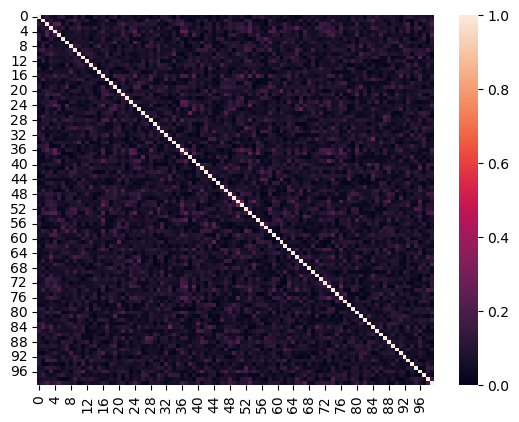

In [149]:
sns.heatmap(cosine_sim)

In [133]:
df[df['keywords'].str.contains('database')]

,moduleName,id,keywords,intro,description,objectives,_id,features
4,Namfix,5,object-oriented frame time-frame eco-centric g...,Focused transitional support,Cross-group uniform solution,Zend JCAPS Equity Research dsPIC Biology,6400ca8dfc13ae6500000838,Namfix Focused transitional support Cross-grou...
22,Tin,23,task-force web-enabled project global Progress...,Profit-focused high-level architecture,Devolved bi-directional database,Film Production Knowledge Engineering Btrieve ...,6400ca8dfc13ae650000084a,Tin Profit-focused high-level architecture Dev...
45,Bytecard,46,Profound concept adapter database Function-bas...,Business-focused dynamic standardization,Reduced clear-thinking model,Tax Accounting Medical Education FFE Pro-IV Hi...,6400ca8efc13ae6500000861,Bytecard Business-focused dynamic standardizat...
50,Pannier,51,background Ergonomic task-force bottom-line th...,Upgradable bifurcated software,Exclusive bottom-line implementation,FCoE Home Owners Ajax4JSF Nutritional Counseli...,6400ca8efc13ae6500000866,Pannier Upgradable bifurcated software Exclusi...
51,It,52,next generation productivity encompassing algo...,Decentralized content-based instruction set,Organic heuristic secured line,LDRA Biomass Structural Dynamics Aftersales Al...,6400ca8efc13ae6500000867,It Decentralized content-based instruction set...
93,Temp,94,adapter database zero defect eco-centric Re-en...,Team-oriented value-added website,Programmable content-based analyzer,Cardiac Rhythm Management Personal Training XR...,6400ca8efc13ae6500000891,Temp Team-oriented value-added website Program...


In [134]:
title = 'It'

module_id = df[df['moduleName'] == title]['id'].values[0]

In [135]:
module_id

52

In [137]:
score = list(enumerate(cosine_sim[module_id]))

In [138]:
sorted_score = sorted(score, key=lambda x: x[1], reverse=True)

sorted_score = sorted_score[1:]

In [139]:
sorted_score[0:10]

[(30, 0.21700926997668546),
 (58, 0.21434647870329343),
 (95, 0.20333142711013955),
 (9, 0.17791499872137212),
 (96, 0.16671392788033934),
 (18, 0.16279069767441862),
 (12, 0.15042366316917008),
 (79, 0.14651588715165131),
 (53, 0.14467284665112362),
 (8, 0.1428976524688623)]

In [147]:
i = 0
for item in sorted_score:
    module_title = df[df['id'] == item[0]]['moduleName'].values[0]
    module_oid = df[df['id'] == item[0]]['_id'].values[0]
    print(i+1,module_title, module_oid, item[1])
    i = i+1
    if i > 9:
        break

1 Flexidy 6400ca8dfc13ae6500000851 0.21700926997668546
2 Subin 6400ca8efc13ae650000086d 0.21434647870329343
3 Treeflex 6400ca8efc13ae6500000892 0.20333142711013955
4 Voyatouch 6400ca8dfc13ae650000083c 0.17791499872137212
5 Ventosanzap 6400ca8efc13ae6500000893 0.16671392788033934
6 Prodder 6400ca8dfc13ae6500000845 0.16279069767441862
7 Kanlam 6400ca8dfc13ae650000083f 0.15042366316917008
8 Fix San 6400ca8efc13ae6500000882 0.14651588715165131
9 Voltsillam 6400ca8efc13ae6500000868 0.14467284665112362
10 Home Ing 6400ca8dfc13ae650000083b 0.1428976524688623
